# Machine Learning with Bob Ross

### Unsupervised learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#learn more about the dataset from this article: https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv"
df = pd.read_csv(url, index_col = 1)
df = df.drop('EPISODE', 1) #remove the episode number because we already have the painting title as an identifier
df.head()

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
TITLE,,,,,,,,,,,,,,,,,,,,,
"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [3]:
sum(df.BOAT)

2

###### K-means clustering

split the observations into k user-defined groups such that each observation belongs to a cluster, and no observation belongs to more than one cluster

how do we know the right value for k? (minimize within-cluster variation, you can do this many ways, but most people use squared euclidean distance )


In [4]:
#randomly assign an initial group (1-K) for each observation
#until cluster assignments stop changing: 
    #compute the centroid of each cluster
    #assign each observation to the cluster with the closest centroid

Text(0, 0.5, 'within-cluster variance')

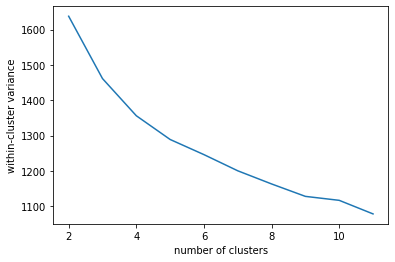

In [50]:
from sklearn.cluster import KMeans

# X = df.iloc[:, 1:]
# print(X.head())
wcv = []
cluster_plots = []
for k in range(2,12): 
    kmeans = KMeans(n_clusters=k)
    fit = kmeans.fit(df)
    wcv.append(kmeans.inertia_) #within-cluster variance
    
    
    
plt.plot(range(2,12), wcv)
plt.xlabel("number of clusters")
plt.ylabel("within-cluster variance")

###### Heirarchical clustering

doesn't require us to choose the number of clusters

uses a tree-based method


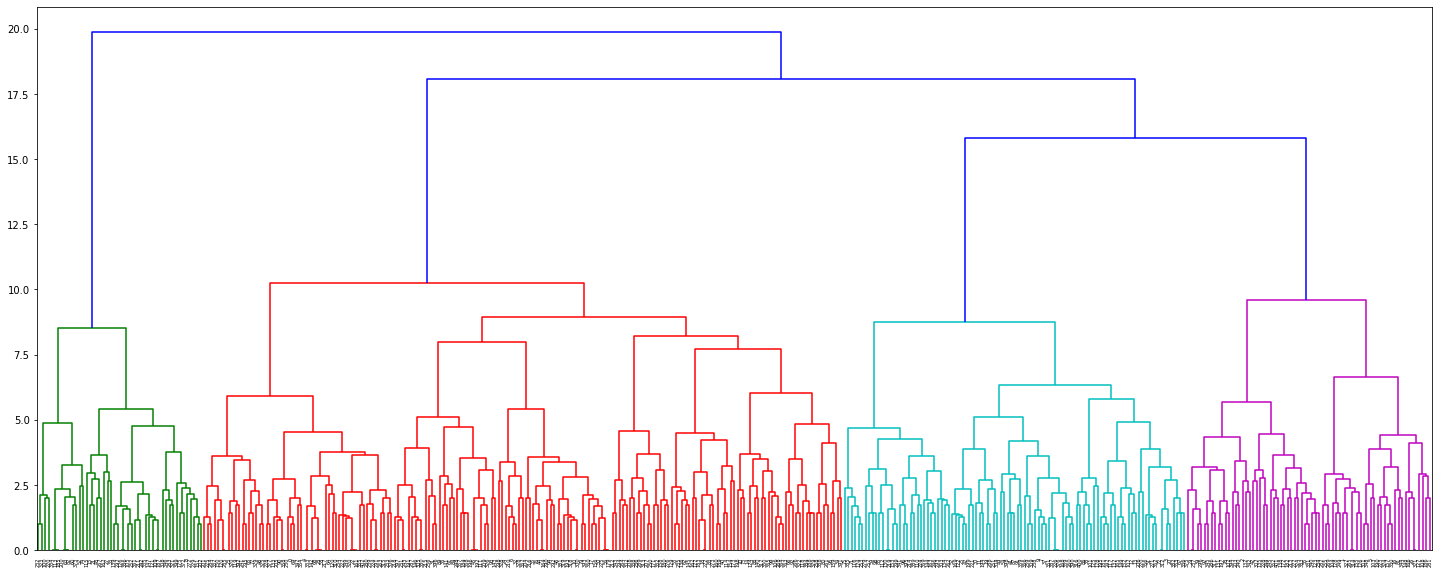

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(25, 10))
dendrogram(linkage(df, method='ward'))
plt.show()

###### Principal Component Analysis 

Helps us find the most "important" variables by creating a composite set of varaibles defined by the variance in each direction

Usually used for dimension reduction

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=5) #can have as many PCs as there are varibles
fit = pca.fit_transform(scaled)
print(pca.explained_variance_ratio_)



[0.08423984 0.05220288 0.04617684 0.03538854 0.03266029]


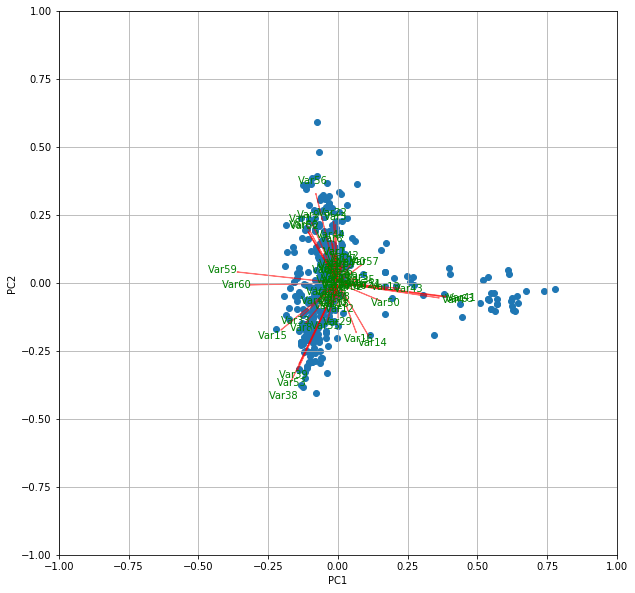

In [85]:
#biplot code from https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10, 10))
myplot(fit[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [95]:
features = [59, 38, 36, 41]
print([df.columns.values[f] for f in features])

['TREES', 'MOUNTAINS', 'MOON', 'OVAL_FRAME']


### Supervised Learning

Has a response variable (dependent variable)

You can do predictions

Does the painting have a mountain? 

In [97]:
sum(df.MOUNTAIN)/len(df.MOUNTAIN)

0.3970223325062035

###### Random forest

In [100]:
#training and testing 
from sklearn.model_selection import train_test_split

y = df.MOUNTAIN
X = df.drop("MOUNTAIN", 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

yhat = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("AUC:",metrics.roc_auc_score(y_test, yhat))

Accuracy: 0.9548872180451128
AUC: 0.9423076923076923


###### K-Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_train, y_train)

yhat = neighbors.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("AUC:",metrics.roc_auc_score(y_test, yhat))

Accuracy: 0.9323308270676691
AUC: 0.9134615384615384


###### Support Vector Classifier

In [109]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

yhat = neighbors.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("AUC:",metrics.roc_auc_score(y_test, yhat))

Accuracy: 0.9323308270676691
AUC: 0.9134615384615384
